## `VMEC`中的坐标系

`VMEC`使用磁面坐标$(\rho, \vartheta, \varphi)$，其中径向坐标$\rho(\psi)$与磁通$\psi$相关，$\vartheta$为任意的极向角，$\varphi$为环向角，与柱坐标的环向角$\phi$一致或方向相反$\varphi=\pm\phi$。

磁场在`VMEC`坐标系中可以写作
$$ \mathbf{B} = \nabla\psi(\rho)\times\nabla(\vartheta+\lambda(\vartheta,\varphi)) + \iota\nabla\varphi\times\nabla\psi(\rho)$$
即
$$ \mathbf{B} = \sqrt{g}^{-1}\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(\iota-\frac{\partial\lambda}{\partial\varphi}\right)\partial\mathbf{x}_\vartheta 
+ \sqrt{g}^{-1}\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(1+\frac{\partial\lambda}{\partial\vartheta}\right)\partial\mathbf{x}_\varphi $$
$$ = B^\vartheta\partial\mathbf{x}_\vartheta + B^\varphi\partial\mathbf{x}_\varphi $$ 
即有关系式
$$ \sqrt{g}B^\vartheta = \frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(\iota-\frac{\partial\lambda}{\partial\varphi}\right) $$
$$ \sqrt{g}B^\varphi = \frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(1+\frac{\partial\lambda}{\partial\vartheta}\right) $$
考虑仿星器对称，在`VMEC.output`中，$\sqrt{g}$由`gmnc`给出，$B^\vartheta$和$B^\varphi$由`bsupumnc`和`bsupvmnc`给出，$\frac{\mathrm{d}\psi}{\mathrm{d}\rho}$由`phips`给出，$\lambda$由`lmns`给出。

对于旋转变换$\iota$可以直接从`VMEC.output`中读出，也可以通过磁面平均计算
$$ \iota = \frac{\left<\mathbf{B}\cdot\nabla\vartheta\right>}{\left<\mathbf{B}\cdot\nabla\varphi\right>} = \frac{\iint\sqrt{g}B^\vartheta\mathrm{d}\vartheta\mathrm{d}\varphi}{\iint\sqrt{g}B^\varphi\mathrm{d}\vartheta\mathrm{d}\varphi} $$ 
将各物理量作傅里叶展开
$$ \iota = \frac{(\sqrt{g}B^\vartheta)_{0,0}}{(\sqrt{g}B^\varphi)_{0,0}} = \frac{\sum\sum\sqrt{g}_{m,n}B^\vartheta_{-m,-n}}{\sum\sum\sqrt{g}_{m,n}B^\varphi_{-m,-n}} $$

## 验证`VMEC`中的各物理量

In [22]:
import numpy as np
import dcs.vmec 
from dcs.toroidalField import ToroidalField, derivatePol, derivateTor,changeResolution
import matplotlib.pyplot as plt
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass

In [23]:
fileName = "wout_QAS.nc"
# fileName = "wout_DIII-D.nc"
# fileName = "wout_heliotron.nc"
vmeclib = dcs.vmec.VMECOut(fileName)

### 旋转变换

对于旋转变换$\iota$可以直接从`VMEC.output`中读出，也可以通过磁面平均计算
$$ \iota = \frac{\left<\mathbf{B}\cdot\nabla\vartheta\right>}{\left<\mathbf{B}\cdot\nabla\varphi\right>} = \frac{\iint\sqrt{g}B^\vartheta\mathrm{d}\vartheta\mathrm{d}\varphi}{\iint\sqrt{g}B^\varphi\mathrm{d}\vartheta\mathrm{d}\varphi} $$ 
将各物理量作傅里叶展开
$$ \iota = \frac{(\sqrt{g}B^\vartheta)_{0,0}}{(\sqrt{g}B^\varphi)_{0,0}} = \frac{\sum\sum\sqrt{g}_{m,n}B^\vartheta_{-m,-n}}{\sum\sum\sqrt{g}_{m,n}B^\varphi_{-m,-n}} $$

In [24]:
surface, _lambdaField = vmeclib.getSurface()
jacobian = vmeclib.getJacobian()
bSupU, bSupV = vmeclib.getBsup()
lambdaField = changeResolution(_lambdaField, mpol=jacobian.mpol, ntor=jacobian.ntor)
print("直接从VMEC.output中读到 iota = " + str(vmeclib.iotaf[-1]))

jacobianBsupU = (jacobian*bSupU)
jacobianBsupV = (jacobian*bSupV)
print("对磁场分量作磁面平均计算得到 iota = "+ str(jacobianBsupU.reArr[0]/jacobianBsupV.reArr[0]))

直接从VMEC.output中读到 iota = 0.6547083985539908
对磁场分量作磁面平均计算得到 iota = 0.6555218854684781


### 磁面形状

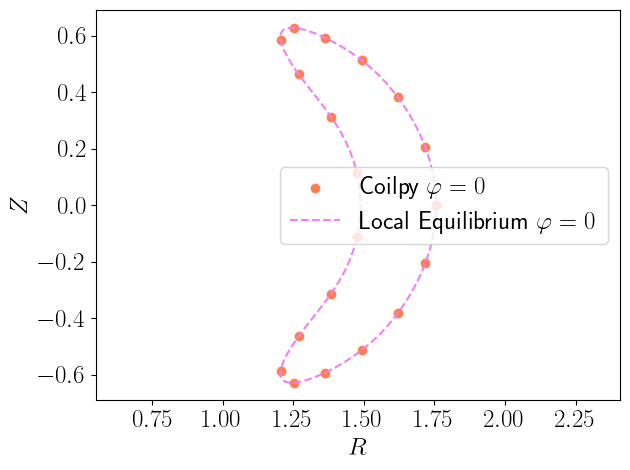

In [25]:
from coilpy import FourSurf
coilpySurf = FourSurf.read_vmec_output(fileName)

fig, ax = plt.subplots()
coilpyRZ = coilpySurf.rz(np.linspace(0,2*np.pi,20),np.ones(20)*0)
ax.scatter(
    coilpyRZ[0],
    coilpyRZ[1],
    c = "coral",
    label = "Coilpy " + r"$\varphi=0$"
)
ax.plot(
    surface.r.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*0).flatten(), 
    surface.z.getValue(np.linspace(0,2*np.pi,100),np.ones(100)*0).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium " + r"$\varphi=0$"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$R$", fontsize=18)
ax.set_ylabel(r"$Z$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
_ = plt.axis("equal")
fig.tight_layout()

### $\lambda$

`VMEC`使用磁面坐标$(\rho, \vartheta, \varphi)$，其中径向坐标$\rho(\psi)$与磁通$\psi$相关，$\vartheta$为任意的极向角，$\varphi$为环向角，与柱坐标的环向角$\phi$一致或方向相反$\varphi=\pm\phi$。

磁场在`VMEC`坐标系中可以写作
$$ \mathbf{B} = \nabla\psi(\rho)\times\nabla(\vartheta+\lambda(\vartheta,\varphi)) + \iota\nabla\varphi\times\nabla\psi(\rho)$$
即
$$ \mathbf{B} = \sqrt{g}^{-1}\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(\iota-\frac{\partial\lambda}{\partial\varphi}\right)\partial\mathbf{x}_\vartheta 
+ \sqrt{g}^{-1}\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(1+\frac{\partial\lambda}{\partial\vartheta}\right)\partial\mathbf{x}_\varphi $$
$$ = B^\vartheta\partial\mathbf{x}_\vartheta + B^\varphi\partial\mathbf{x}_\varphi $$ 
即有关系式
$$ \sqrt{g}B^\vartheta = \frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(\iota-\frac{\partial\lambda}{\partial\varphi}\right) $$
$$ \sqrt{g}B^\varphi = \frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(1+\frac{\partial\lambda}{\partial\vartheta}\right) $$
考虑仿星器对称，在`VMEC.output`中，$\sqrt{g}$由`gmnc`给出，$B^\vartheta$和$B^\varphi$由`bsupumnc`和`bsupvmnc`给出，$\frac{\mathrm{d}\psi}{\mathrm{d}\rho}$由`phips`给出，$\lambda$由`lmns`给出。

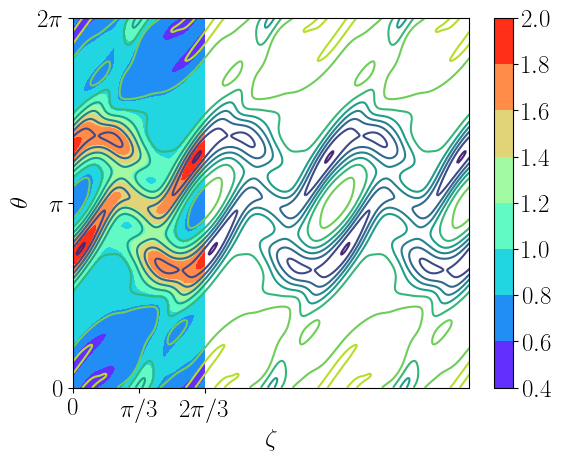

In [26]:
basisTheta, basisZeta = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisZeta, gridBasisTheta = np.meshgrid(basisZeta, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, jacobianBsupV.getValue(gridBasisTheta,gridBasisZeta)
)
(ToroidalField.constantField(1,vmeclib.nfp,lambdaField.mpol,lambdaField.ntor)+derivatePol(lambdaField)).plot_plt(ax=ax, fig=fig, onePeriod=True) 

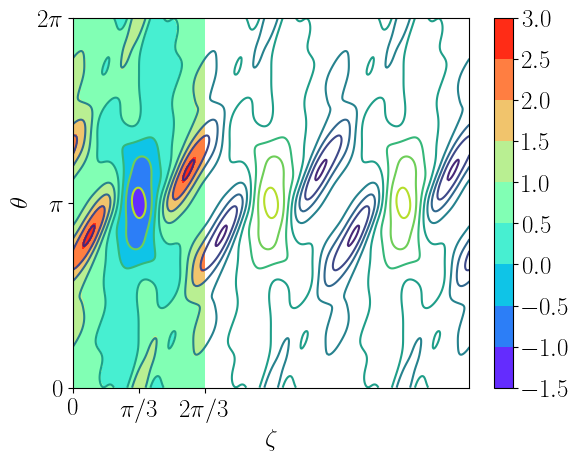

In [27]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, jacobianBsupU.getValue(gridBasisTheta,gridBasisZeta)
)
(ToroidalField.constantField(jacobianBsupU.reArr[0]/jacobianBsupV.reArr[0],vmeclib.nfp,lambdaField.mpol,lambdaField.ntor)-derivateTor(lambdaField)).plot_plt(ax=ax, fig=fig, onePeriod=True) 

Text(0.5, 0, '$\\vartheta$')

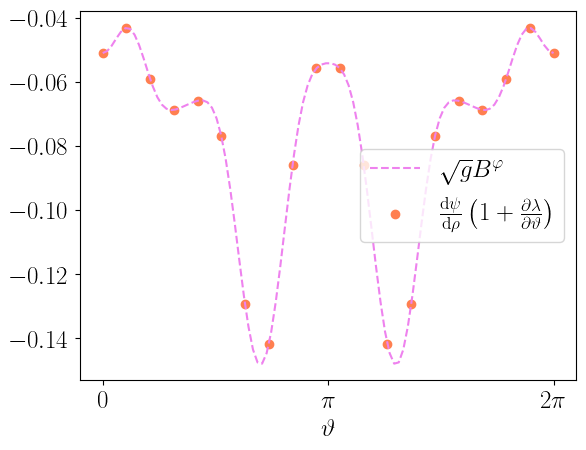

In [28]:
fig, ax = plt.subplots()
ax.plot(
    np.linspace(0, 2*np.pi, 100), 
    jacobianBsupV.getValue(np.linspace(0, 2*np.pi, 100), np.zeros(100)).flatten(), 
    label = r"$\sqrt{g}B^\varphi$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    vmeclib.phips[-1]*(ToroidalField.constantField(1,vmeclib.nfp,lambdaField.mpol,lambdaField.ntor)+derivatePol(lambdaField)).getValue(np.linspace(0,2*np.pi,20),np.zeros(20)).flatten(),
    label = r"$\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(1+\frac{\partial\lambda}{\partial\vartheta}\right)$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)


Text(0.5, 0, '$\\vartheta$')

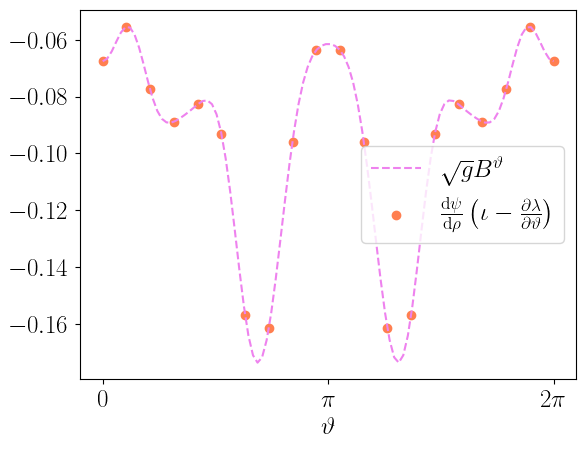

In [29]:
fig, ax = plt.subplots()
ax.plot(
    np.linspace(0, 2*np.pi, 100), 
    jacobianBsupU.getValue(np.linspace(0, 2*np.pi, 100), np.zeros(100)).flatten(), 
    label = r"$\sqrt{g}B^\vartheta$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    vmeclib.phips[-1]*(ToroidalField.constantField(jacobianBsupU.reArr[0]/jacobianBsupV.reArr[0],vmeclib.nfp,lambdaField.mpol,lambdaField.ntor)-derivateTor(lambdaField)).getValue(np.linspace(0,2*np.pi,20),np.zeros(20)).flatten(),
    label = r"$\frac{\mathrm{d}\psi}{\mathrm{d}\rho}\left(\iota-\frac{\partial\lambda}{\partial\vartheta}\right)$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)

### 场强 $B$

$$
B^2 = (B^\vartheta)^2g_{\vartheta\vartheta} + 2B^\vartheta B^\varphi g_{\vartheta\varphi} + (B^\varphi)^2g_{\varphi\varphi}
$$

In [30]:
vmecB = vmeclib.getB()

Text(0.5, 0, '$\\vartheta$')

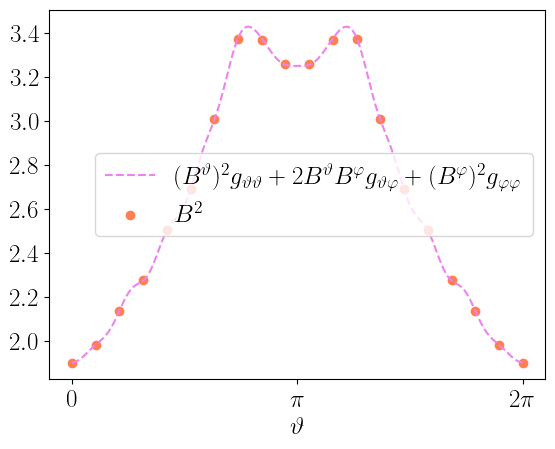

In [31]:
fig, ax = plt.subplots()
# zetaValue = np.pi/6
zetaValue = 0
ax.plot(
    np.linspace(0, 2*np.pi, 200), 
    (
        bSupU*bSupU*surface.metric[0] +
        bSupU*bSupV*surface.metric[1] +
        bSupU*bSupV*surface.metric[1] +
        bSupV*bSupV*surface.metric[2]
    ).getValue(np.linspace(0, 2*np.pi, 200), np.ones(200)*zetaValue).flatten(), 
    label = r"$(B^\vartheta)^2g_{\vartheta\vartheta} + 2B^\vartheta B^\varphi g_{\vartheta\varphi} + (B^\varphi)^2g_{\varphi\varphi}$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    (vmecB*vmecB).getValue(np.linspace(0,2*np.pi,20), np.ones(20)*zetaValue).flatten(),
    label = r"$B^2$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)